In [9]:
from sklearn.neural_network import MLPClassifier
from ml_pipeline import MLPipeline

# MLP Classifier with Wavelet Features

In [10]:
# Initialisation du pipeline avec MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', random_state=42)
pipeline = MLPipeline(model, wavelet='bior1.3')

# Chargement du dataset complet (60000 train, 10000 test)
pipeline.load_data('./data/fashion-mnist_train.csv', './data/fashion-mnist_test.csv', 1/2)

Data loaded successfully:
  Training set: 30000 samples
  Test set: 5000 samples
  Features per sample: 784


MLPipeline(model=MLPClassifier, wavelet='bior1.3', trained=False)

In [11]:
# Entraînement du modèle avec extraction d'ondelettes (SANS normalisation)
pipeline.fit(use_wavelets=True, normalize=False)

Preparing features (normalize=False, wavelets=True, scaler=False)...
Extracting wavelet features...
Training model on 30000 samples with 1024 features...
Model training completed in 14.53s


MLPipeline(model=MLPClassifier, wavelet='bior1.3', trained=True)

Preparing test features (normalize=False, wavelets=True)...
Extracting wavelet features...
Making predictions on 5000 samples...
Predictions completed.

Accuracy: 0.8548

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       487
           1       0.97      0.97      0.97       493
           2       0.70      0.81      0.75       487
           3       0.90      0.86      0.88       498
           4       0.81      0.72      0.76       514
           5       0.98      0.90      0.94       487
           6       0.68      0.61      0.64       513
           7       0.92      0.94      0.93       513
           8       0.95      0.95      0.95       508
           9       0.91      0.95      0.93       500

    accuracy                           0.85      5000
   macro avg       0.86      0.86      0.85      5000
weighted avg       0.86      0.85      0.85      5000




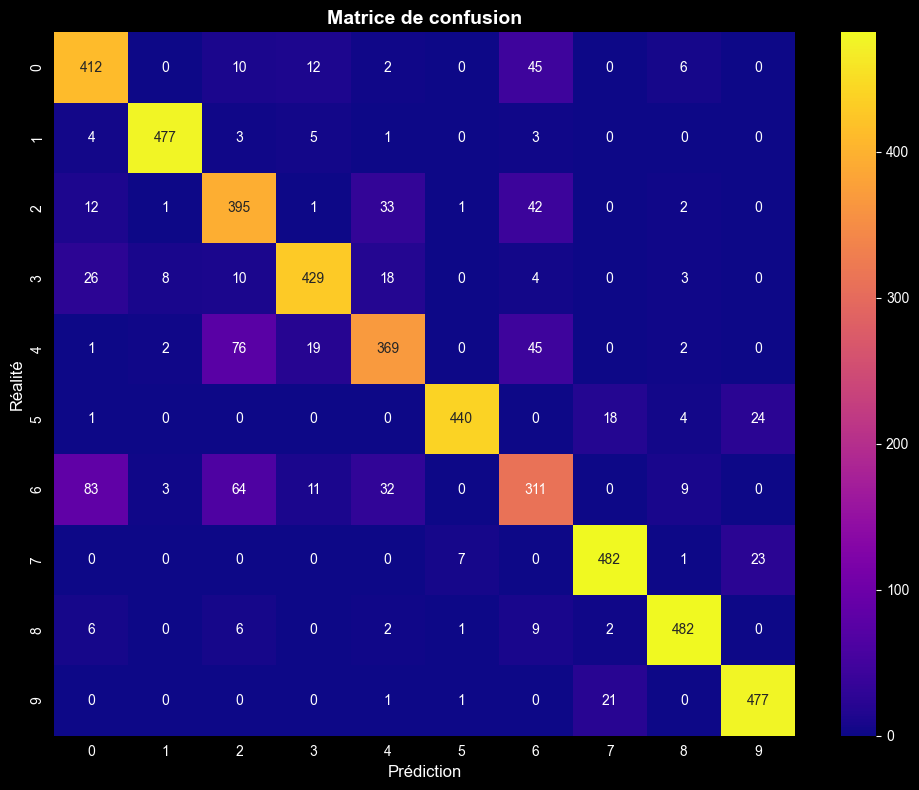

array([[412,   0,  10,  12,   2,   0,  45,   0,   6,   0],
       [  4, 477,   3,   5,   1,   0,   3,   0,   0,   0],
       [ 12,   1, 395,   1,  33,   1,  42,   0,   2,   0],
       [ 26,   8,  10, 429,  18,   0,   4,   0,   3,   0],
       [  1,   2,  76,  19, 369,   0,  45,   0,   2,   0],
       [  1,   0,   0,   0,   0, 440,   0,  18,   4,  24],
       [ 83,   3,  64,  11,  32,   0, 311,   0,   9,   0],
       [  0,   0,   0,   0,   0,   7,   0, 482,   1,  23],
       [  6,   0,   6,   0,   2,   1,   9,   2, 482,   0],
       [  0,   0,   0,   0,   1,   1,   0,  21,   0, 477]])

In [12]:
# Prédiction et évaluation
pipeline.predict()
accuracy = pipeline.get_accuracy()
print(f"\nAccuracy: {accuracy:.4f}")

# Affichage de la matrice de confusion et du rapport de classification
pipeline.evaluate(show_plot=True, show_report=True)